(C:histogram)=
# Histogram

In [1]:
from myst_nb import glue
import os
path = "" if os.getcwd()[-4:] == "book" else "book/"
path += "figs/"

## Definition

The histogram of a digital image depicts how the intensities of its pixels are distributed.
It is the discrete function $h$ such that

$$
h(i) = n_i
$$

where $n_i$ is the number of pixels with intensity $i$.

{numref}`F:histogram:example` shows an image and its associated histogram.
The histogram is displayed as a bar plot, constituted as a set of _bins_.
We distinguish two "modes" on the histogram:
the one on the left corresponds to the dark tones in the image (mainly the background) and the one on the right corresponds to the light tones (the petals and the center).
Since the image has 256 gray levels, the histogram lies on [0,255].

```{glue:figure} G:histogram:example
:name: "F:histogram:example"

A grayscale image and its histogram.
```

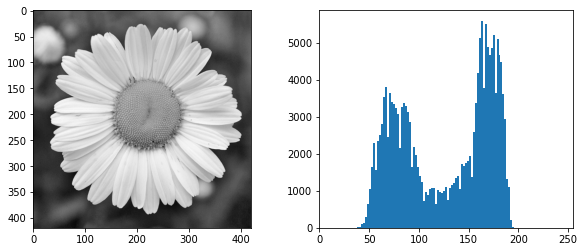

In [2]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

img = io.imread(path + "daisy.png")

fig = plt.figure(figsize=(10,4))

# Image
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")

# Histogram
plt.subplot(1,2,2)
plt.hist(img.ravel(), bins=range(0,256,2))
plt.xlim((0, 255))

glue("G:histogram:example", fig, display=False)
#plt.close(fig)

## Properties

* The histogram can be seen as a discrete probability density function if it is normalized,
  _i.e._ the bins are divided by the pixel number $M \times N$:

  $$
  p(i) = \frac{n_i}{M \times N}
  $$

* The histogram gives a global information about the pixel intensities of an image but lost the spatial information in the image.
  In consequence, two different images can have the same histogram (cf. {numref}`F:histogram:daisy-sorted`).

  ```{glue:figure} G:histogram:daisy-sorted
  :name: "F:histogram:daisy-sorted"
  
  These two images have the same histogram (given [Fig. 7](histogram.html#f-histogram-example)).
  The image on the right actually corresponds to the pixels of the image on the left sorted wit respect to their gray level.
  ```

* The number and width of the bins are chosen by the user.

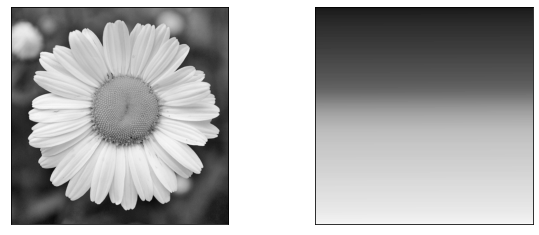

In [3]:
# Charge l'image
img = io.imread(path + "daisy.png")

# Réordonnement des pixels pour avoir une nouvelle image avec le même histogramme
imgs = np.sort(img.ravel())
imgs = np.reshape(imgs, img.shape)

# Affichage
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(imgs, cmap="gray")
plt.xticks([])
plt.yticks([])

plt.show()

glue("G:histogram:daisy-sorted", fig, display=False)

## Histogram transformation

Histogram transformation consists in applying a mathematical function to the intensity distribution.
Some transformations may be useful for improving the visual quality of an image,
although it is rarely needed inside an automatic processing.
So, one can apply a transform $T$ on the pixel intensities to change their values:

$$j = T(i)$$

where $j$ and $i$ are respectively the intensities of the new and the original image.
As a consequence, the histogram of the new image differs from the histogram of the original image.

Below are some common transformations (we suppose the pixel intensities to lie in [0,1]).

**Negative image**

$$T(i) = 1-i$$

```{glue:figure} G:histogram:negative
:name: "F:histogram:negative"

Negative image: the gray levels are reversed.
```

**Gamma correction**

$$T(i) = i^\gamma$$

```{glue:figure} G:histogram:gamma
:name: "F:histogram:gamma"
  
Gamma correction modify the coulours of an image acquired by an electronic system,
it is used to take into account the non-linear sensibility of human eyes to the light.
Here, $\gamma=0.4$
```

**Histogram spreading**

$$T(i) = \frac{i-i_\text{min}}{i_\text{max}-i_\text{min}}$$

where $i_\text{min}$ and $i_\text{max}$ are respectively the minimum and maximum valeurs of the image.

```{glue:figure} G:histogram:spread
:name: "F:histogram:spread"

Histogram spreading enhances the contrast by "dilating" the histogram to the whole intensity interval.
```

**Histogram equalization**

$$T(i) = \frac{1}{MN} \sum_{k=0}^i n_k$$

where $M$ and $N$ are the image size and $n_k$ is the number of pixels with intensity $k$.
This transformation aims to spread the histogram over the entire intensity range, and to make the histogram as flat as possible.
A consequence is an increasing of the image contrast.
It is a fully automatic method that does not require any parameters to be set.
The demonstration of this equation is available in {ref}`[Gonzalez 2010, section 3.3.1] <C:biblio>`.

```{glue:figure} G:histogram:equalization
:name: "F:histogram:equalization"

Histogram equalization is another contrast enhancing and tend to make the details more visible.
```

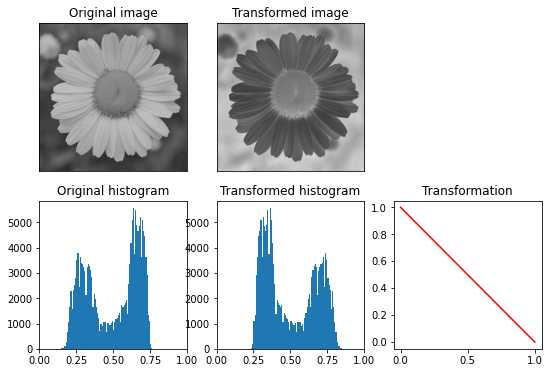

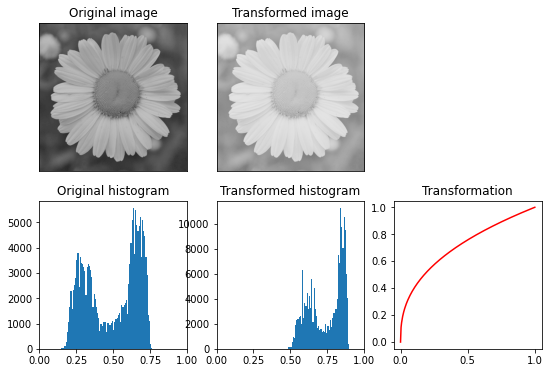

/home/vincent/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater


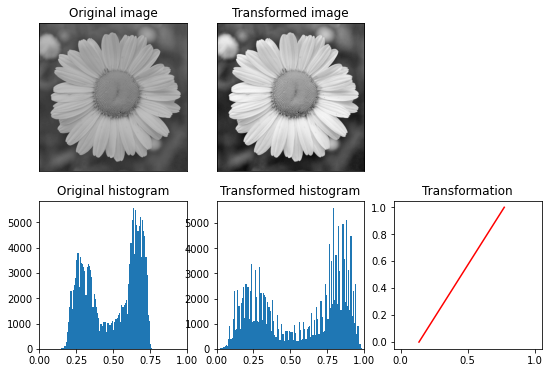

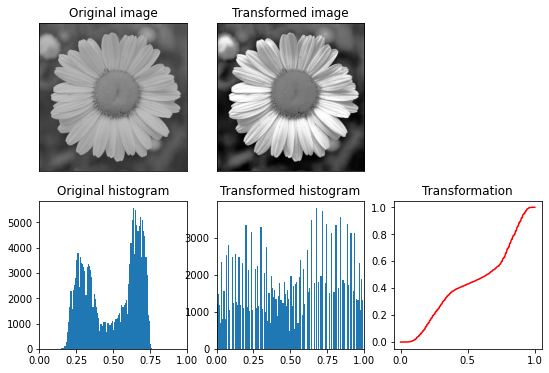

In [26]:
from skimage.exposure import equalize_hist, cumulative_distribution

# Charge l'image
img = io.imread(path + "daisy.png")
img = img / 255

transforms = ["negative","gamma","spread","equalization"]

x = np.linspace(0, 1, 256)

for t in transforms:
    
    if t == "negative":
        new = 1 - img
        transform = 1 - x
        
    if t == "gamma":
        gamma = 0.4;
        new = img**gamma
        transform = x**gamma
        
    if t == "spread":
        transform = (x-img.min()) / (img.max()-img.min())
        transform = np.where(transform<0, np.nan, transform)
        transform = np.where(transform>1, np.nan, transform)
        new = (img-img.min()) / (img.max()-img.min())
        
    if t == "equalization":
        new = equalize_hist(img)
        transform = cumulative_distribution(img, 256)[0]
    
    fig = plt.figure(figsize=(9,6))
    
    plt.subplot(2,3,1)
    plt.imshow(img, cmap="gray", vmin=0, vmax=1)
    plt.xticks([])
    plt.yticks([])
    plt.title("Original image")
    
    plt.subplot(2,3,2)
    plt.imshow(new, cmap="gray", vmin=0, vmax=1)
    plt.xticks([])
    plt.yticks([])
    plt.title("Transformed image")
    
    plt.subplot(2,3,4)
    plt.hist(img.ravel(), bins=np.arange(0,1,1/128))
    plt.xlim((0, 1))
    plt.title("Original histogram")
    
    plt.subplot(2,3,5)
    plt.hist(new.ravel(), bins=np.arange(0,1,1/128))
    plt.xlim((0, 1))
    plt.title("Transformed histogram")
    
    plt.subplot(2,3,6)
    plt.plot(x, transform, 'r')
    plt.xlim((-.05, 1.05))
    plt.ylim((-.05, 1.05))
    plt.title("Transformation")
    
    plt.show()

    glue(f"G:histogram:{t}", fig, display=False)

## Thresholding

The histogram is sometimes very useful to segment the image in two classes,
that is to distinguish the objects in the image with respect to their gray level.
Indeed, if the histogram shows clearly two modes (_i.e._ two "bumps"),
on can define a threshold $T$ between these two modes, then apply a thresholding on the pixels, such that:
* if the pixel level is lower that $T$, then the pixel is in class 0 (displayed in black in {numref}`F:histogram:threshold`),
* otherwise the pixel is in class 1 (displayed in white in {numref}`F:histogram:threshold`).

```{glue:figure} G:histogram:threshold
:name: "F:histogram:threshold"

Threshold with a threshold set to 115.
```

Such a thresholding yields a binary image whose pixels have only two values.
Several methods exist that compute automatically the threshold, such that {ref}`Otsu's method <C:segmentation>`.

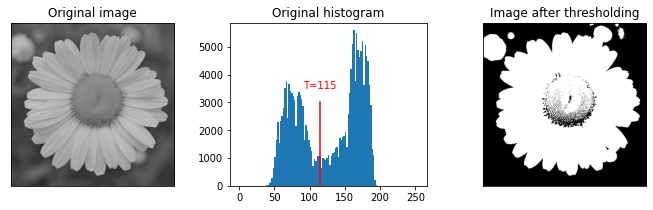

In [47]:
# Charge l'image
img = io.imread(path + "daisy.png")

# Seuillage
T = 115
new = img > T

fig = plt.figure(figsize=(12,3))
    
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])
plt.title("Original image")
    
plt.subplot(1,3,2)
plt.hist(img.ravel(), bins=np.arange(0,256,2))
plt.plot([T, T], [0, 3000], 'r')
plt.text(T, 3500, f"T={T}", horizontalalignment='center', color='r')
plt.title("Original histogram")

plt.subplot(1,3,3)
plt.imshow(new, cmap="gray", vmin=0, vmax=1)
plt.xticks([])
plt.yticks([])
plt.title("Image after thresholding")

plt.show()

glue("G:histogram:threshold", fig, display=False)